<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 136.9 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-11 20:44:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.3MB/s    in 2.6s    

2025-06-11 20:44:26 (59.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



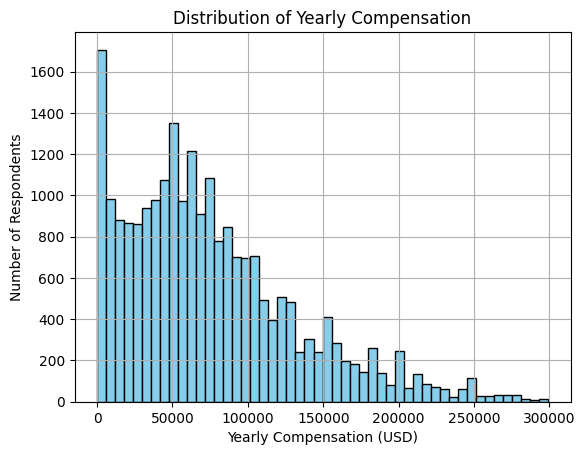

In [5]:
## Write your code here
import matplotlib.pyplot as plt

# Drop missing values
df_comp = df['ConvertedCompYearly'].dropna()
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
# Optional: filter out extreme outliers for better readability
df_comp = df_comp[df_comp < 300000]  # adjust threshold as needed

# Plot histogram
plt.hist(df_comp, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



/tmp/ipykernel_300/1932898298.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeNumeric'] = df['Age'].map(age_mapping)


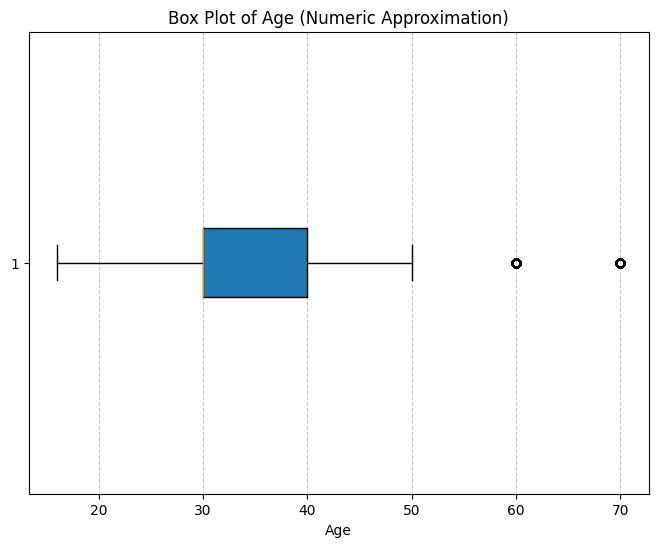

In [6]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Example: if you're loading data from a database or CSV
# df = pd.read_sql_query("SELECT Age FROM main", conn)

# Define the mapping from age category to numeric value (approximate midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply the mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with NaNs (e.g., 'Prefer not to say' or missing Age)
df_clean = df.dropna(subset=['AgeNumeric'])

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['AgeNumeric'], vert=False, patch_artist=True)
plt.title('Box Plot of Age (Numeric Approximation)')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



/tmp/ipykernel_300/1720440341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_numeric'] = df['Age'].map(age_mapping)
/tmp/ipykernel_300/1720440341.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')


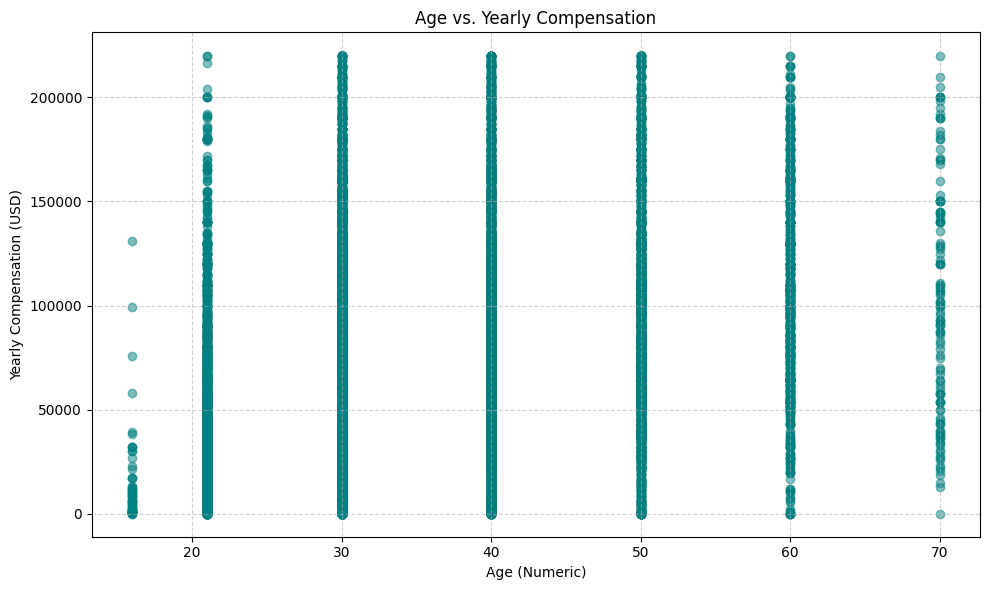

In [7]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Example mapping if not already done
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Map and clean the data
df['Age_numeric'] = df['Age'].map(age_mapping)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Optional: remove extreme outliers in compensation
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age_numeric'], df_clean['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title('Age vs. Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_300/1707859463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_300/1707859463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
/tmp/ipykernel_300/1707859463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

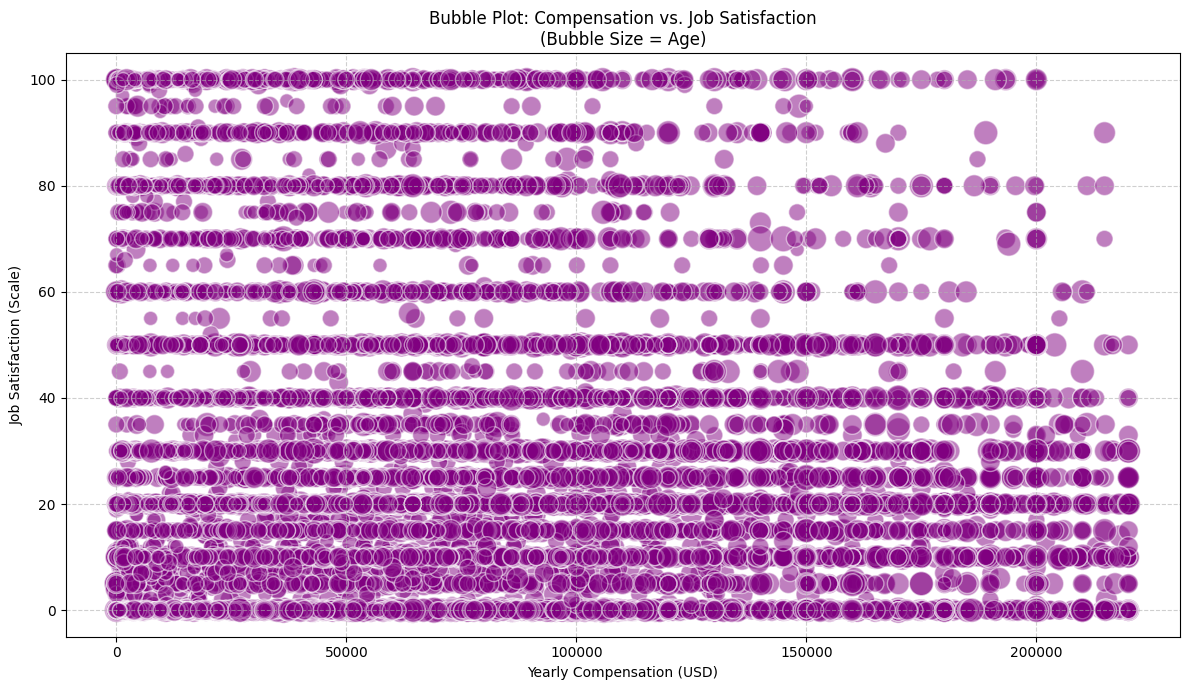

In [8]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Clean the relevant columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Optional: remove outliers in compensation
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Plot bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSatPoints_6'],
    s=df_clean['Age_numeric'] * 5,  # scale bubble size
    alpha=0.5,
    c='purple',
    edgecolors='w'
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Scale)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(Bubble Size = Age)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



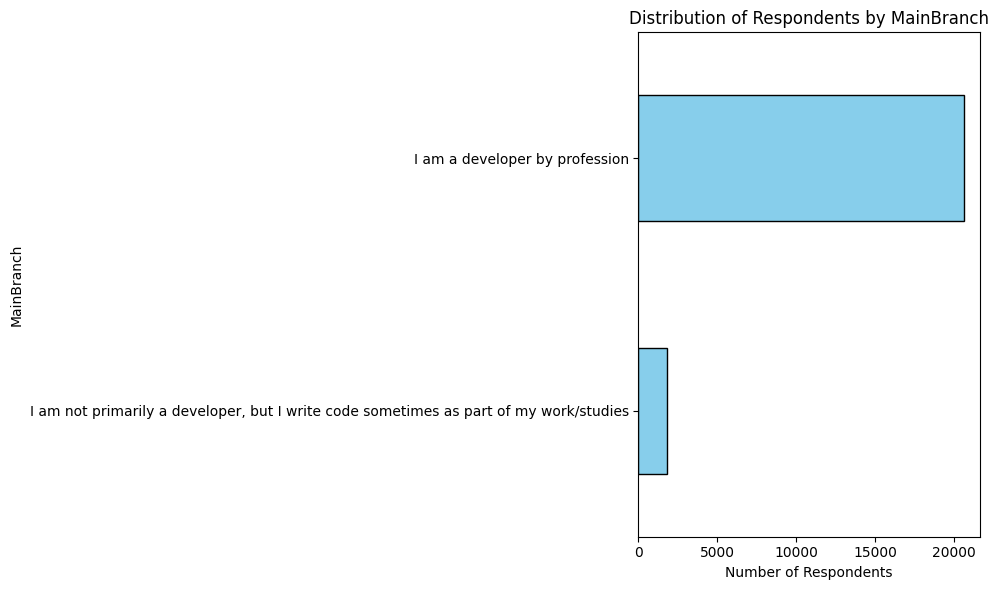

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_branch = df.dropna(subset=['MainBranch'])

# Count the frequency of each MainBranch category
mainbranch_counts = df_branch['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Number of Respondents')
plt.title('Distribution of Respondents by MainBranch')
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



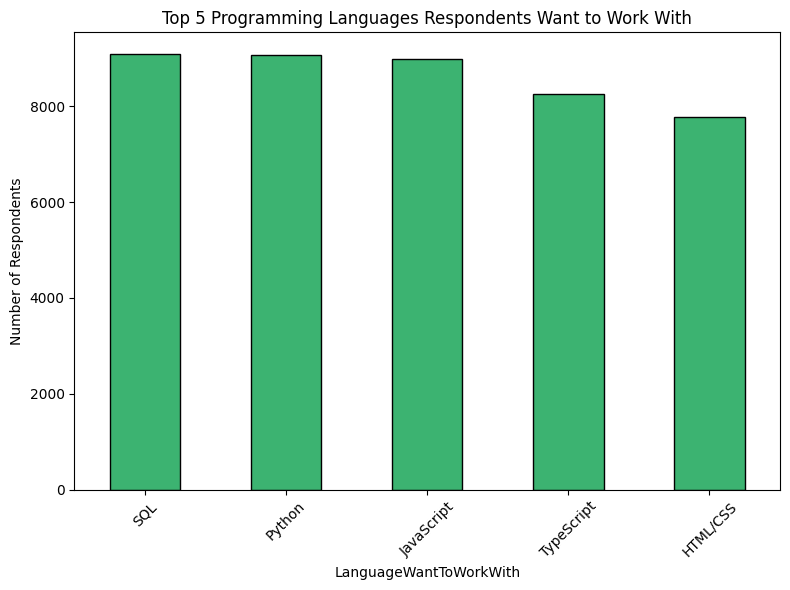

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_lang = df.dropna(subset=['LanguageWantToWorkWith'])

# Split multiple responses
df_lang = df_lang.assign(LanguageWantToWorkWith=df_lang['LanguageWantToWorkWith'].str.split(';'))
df_lang = df_lang.explode('LanguageWantToWorkWith')

# Count top 5 languages
top_languages = df_lang['LanguageWantToWorkWith'].value_counts().nlargest(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
top_languages.plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Customize the plot
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_300/2047962782.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_300/2047962782.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()


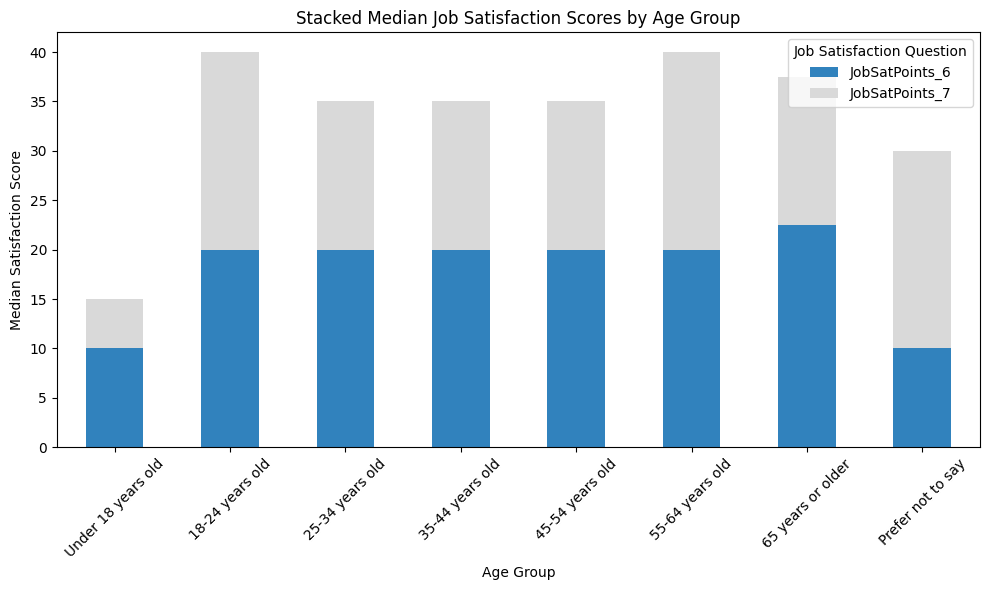

In [12]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Define and order age categories
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Group by Age and calculate medians
grouped = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Stacked Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Question')
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_300/1495039387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db['DatabaseHaveWorkedWith'] = df_db['DatabaseHaveWorkedWith'].str.split(';')


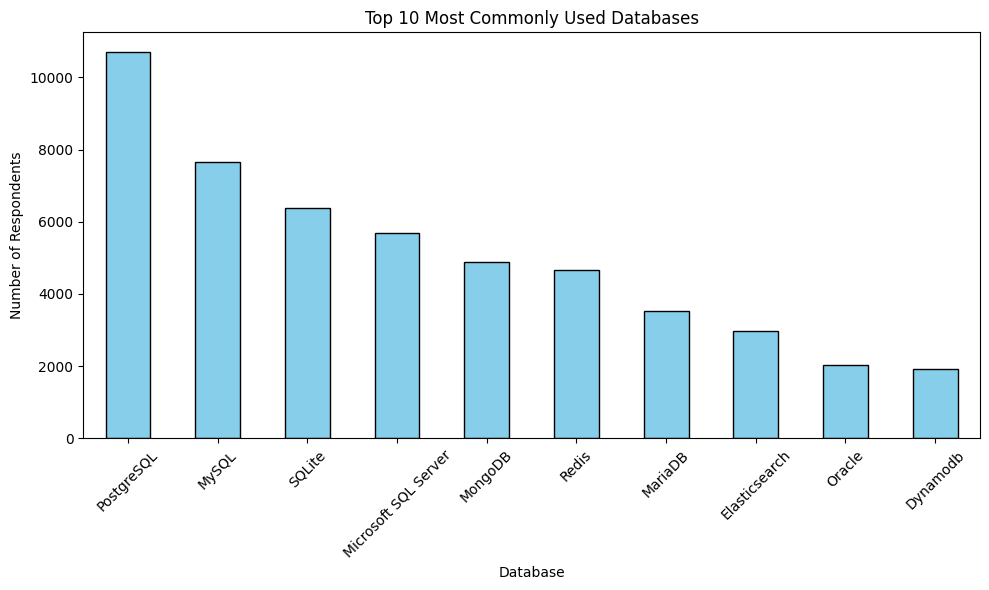

In [13]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in the target column
df_db = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split multiple database entries
df_db['DatabaseHaveWorkedWith'] = df_db['DatabaseHaveWorkedWith'].str.split(';')

# Explode into individual rows
df_db_exploded = df_db.explode('DatabaseHaveWorkedWith')

# Count frequency of each database
db_counts = df_db_exploded['DatabaseHaveWorkedWith'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_300/3029023121.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('Age')['ConvertedCompYearly'].median().dropna()


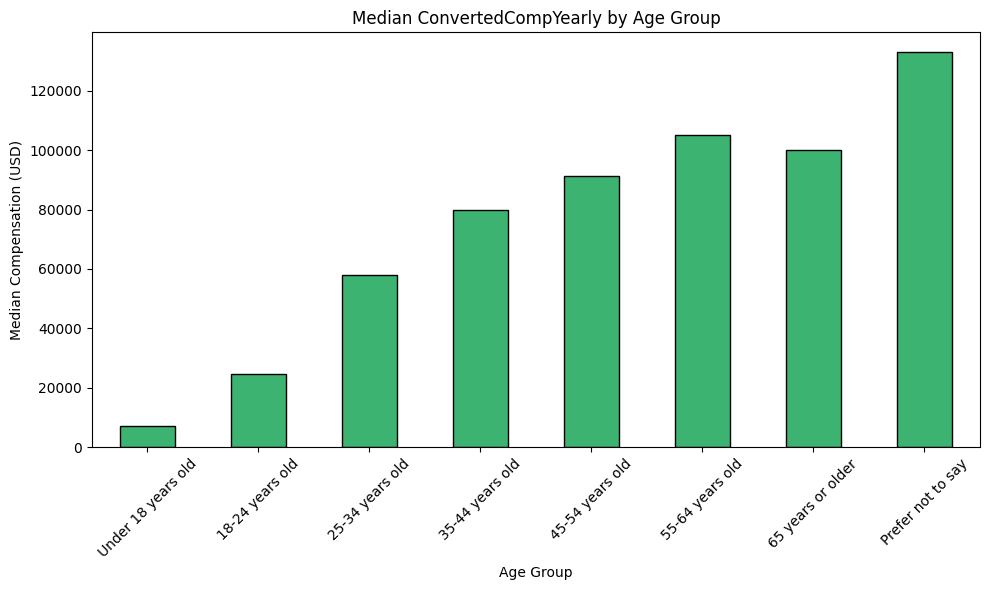

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Age'])

# Optional: Define custom order for age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]

# Convert Age to categorical with defined order
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Group by age and compute median compensation
grouped = df_clean.groupby('Age')['ConvertedCompYearly'].median().dropna()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



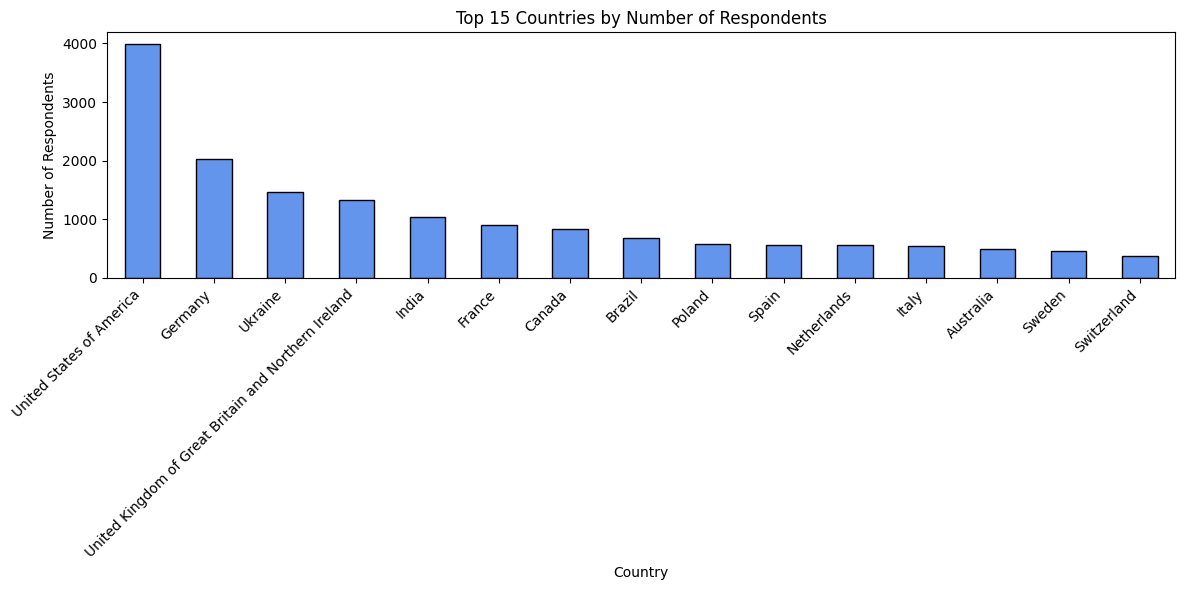

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing country entries
df_country = df.dropna(subset=['Country'])

# Count number of respondents per country
country_counts = df_country['Country'].value_counts().head(15)  # top 15 for readability

# Plot bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Top 15 Countries by Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
